In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xarray 
import matplotlib.patches as mpatches
import os


In [2]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]


#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]


#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))

    

In [3]:
def PlotMap(data,cluster=None):
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16,8))
    
    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 1.0  # Minimum value for the color scale
    vmax = -1.0 # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    
      }
    
    colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
    
    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor=colors[i],facecolor='None')
        ax.add_patch(rect)
        i+=1
        
           
    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Rainfall')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'World Map {cluster}')
    
    #plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [4]:
def giveCombinedMap(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12):
    combine1=region1.combine_first(region2.combine_first(region3.combine_first(region4.combine_first(region5.combine_first(region6.combine_first(region7.combine_first(region8.combine_first(region9.combine_first(region10.combine_first(region11.combine_first(region12)))))))))))
    return combine1

In [5]:
#Find the climatological mean i.e a mean of 
combined_data_region1 = xarray.concat(region1, dim='years')
mean_region1_map = combined_data_region1.mean(dim='years')
region1_mean_number = mean_region1_map.mean()

combined_data_region2 = xarray.concat(region2, dim='years')
mean_region2_map = combined_data_region2.mean(dim='years')
region2_mean_number = mean_region2_map.mean()

combined_data_region3 = xarray.concat(region3, dim='years')
mean_region3_map = combined_data_region3.mean(dim='years')
region3_mean_number = mean_region3_map.mean()

combined_data_region4 = xarray.concat(region4, dim='years')
mean_region4_map = combined_data_region4.mean(dim='years')
region4_mean_number = mean_region4_map.mean()

combined_data_region5 = xarray.concat(region5, dim='years')
mean_region5_map = combined_data_region5.mean(dim='years')
region5_mean_number = mean_region5_map.mean()

combined_data_region6 = xarray.concat(region6, dim='years')
mean_region6_map = combined_data_region6.mean(dim='years')
region6_mean_number = mean_region6_map.mean()

combined_data_region7 = xarray.concat(region7, dim='years')
mean_region7_map = combined_data_region7.mean(dim='years')
region7_mean_number = mean_region7_map.mean()

combined_data_region8 = xarray.concat(region8, dim='years')
mean_region8_map = combined_data_region8.mean(dim='years')
region8_mean_number = mean_region8_map.mean()

combined_data_region9 = xarray.concat(region9, dim='years')
mean_region9_map = combined_data_region9.mean(dim='years')
region9_mean_number = mean_region9_map.mean()

combined_data_region10 = xarray.concat(region10, dim='years')
mean_region10_map = combined_data_region10.mean(dim='years')
region10_mean_number = mean_region10_map.mean()

combined_data_region11 = xarray.concat(region11, dim='years')
mean_region11_map = combined_data_region11.mean(dim='years')
region11_mean_number = mean_region11_map.mean()

combined_data_region12 = xarray.concat(region12, dim='years')
mean_region12_map = combined_data_region12.mean(dim='years')
region12_mean_number = mean_region12_map.mean()

 

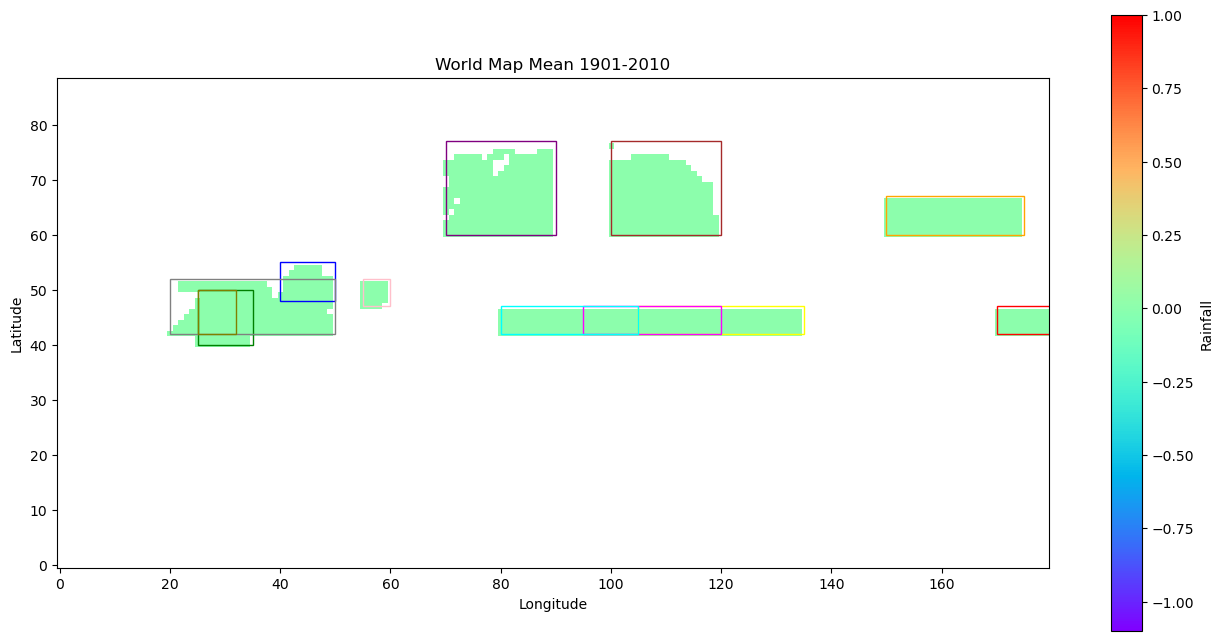

In [9]:
mean_all_regions=giveCombinedMap(mean_region1_map,mean_region2_map,mean_region3_map,mean_region4_map,mean_region5_map,
       mean_region11_map,mean_region10_map,mean_region9_map,mean_region8_map,mean_region7_map,mean_region6_map
       ,mean_region12_map)

PlotMap(mean_all_regions.to_array()[0],"Mean 1901-2010")

In [10]:
#Calculating the standard deviation
std_region1_map = combined_data_region1.std(dim='years') 
std_region1_number=std_region1_map.mean()

std_region2_map = combined_data_region2.std(dim='years') 
std_region2_number=std_region2_map.mean()

std_region3_map = combined_data_region3.std(dim='years') 
std_region3_number=std_region3_map.mean()

std_region4_map = combined_data_region4.std(dim='years') 
std_region4_number=std_region4_map.mean()

std_region5_map = combined_data_region5.std(dim='years') 
std_region5_number=std_region5_map.mean()

std_region6_map = combined_data_region6.std(dim='years') 
std_region6_number=std_region6_map.mean()

std_region7_map = combined_data_region7.std(dim='years') 
std_region7_number=std_region7_map.mean()

std_region8_map = combined_data_region8.std(dim='years') 
std_region8_number=std_region8_map.mean()

std_region9_map = combined_data_region9.std(dim='years') 
std_region9_number=std_region9_map.mean()

std_region10_map = combined_data_region10.std(dim='years') 
std_region10_number=std_region10_map.mean()

std_region11_map = combined_data_region11.std(dim='years') 
std_region11_number=std_region11_map.mean()

std_region12_map = combined_data_region12.std(dim='years') 
std_region12_number=std_region12_map.mean()


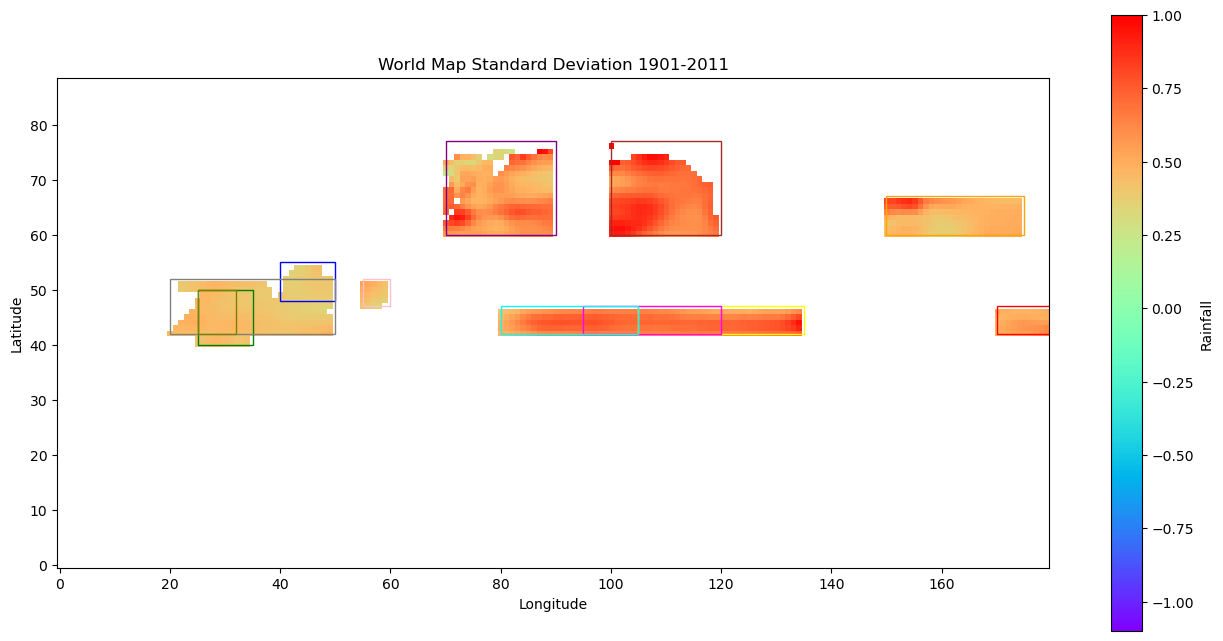

In [11]:
std_all_regions=giveCombinedMap(std_region1_map,std_region2_map,std_region3_map,std_region4_map,std_region5_map,std_region6_map,
                               std_region7_map,std_region8_map,std_region9_map,std_region10_map,std_region11_map,std_region12_map)

PlotMap(std_all_regions.to_array()[0],"Standard Deviation 1901-2011")

In [12]:
region1_number=[]
region2_number=[]
region3_number=[]
region4_number=[]
region5_number=[]
region6_number=[]
region7_number=[]
region8_number=[]
region9_number=[]
region10_number=[]
region11_number=[]
region12_number=[]

for i in range(len(region1)):
    region1_number.append(region1[i].mean())
    region2_number.append(region2[i].mean())
    region3_number.append(region3[i].mean())
    region4_number.append(region4[i].mean())
    region5_number.append(region5[i].mean())
    region6_number.append(region6[i].mean())
    region7_number.append(region7[i].mean())
    region8_number.append(region8[i].mean())
    region9_number.append(region9[i].mean())
    region10_number.append(region10[i].mean())
    region11_number.append(region11[i].mean())
    region12_number.append(region12[i].mean())

In [13]:
def getStandardizeAnomalyNumber(anomaly_number,mean_number,variance_number):
    return (mean_number-anomaly_number)/variance_number

In [14]:
standardize_region1_number=[]
standardize_region2_number=[]
standardize_region3_number=[]
standardize_region4_number=[]
standardize_region5_number=[]
standardize_region6_number=[]
standardize_region7_number=[]
standardize_region8_number=[]
standardize_region9_number=[]
standardize_region10_number=[]
standardize_region11_number=[]
standardize_region12_number=[]


for i in range(len(region1)):
    standardize_region1_number.append(getStandardizeAnomalyNumber(region1_number[i],region1_mean_number,std_region1_number))
    standardize_region2_number.append(getStandardizeAnomalyNumber(region2_number[i],region2_mean_number,std_region2_number))
    standardize_region3_number.append(getStandardizeAnomalyNumber(region3_number[i],region3_mean_number,std_region3_number))
    standardize_region4_number.append(getStandardizeAnomalyNumber(region4_number[i],region4_mean_number,std_region4_number))
    standardize_region5_number.append(getStandardizeAnomalyNumber(region5_number[i],region5_mean_number,std_region5_number))
    standardize_region6_number.append(getStandardizeAnomalyNumber(region6_number[i],region6_mean_number,std_region6_number))
    standardize_region7_number.append(getStandardizeAnomalyNumber(region7_number[i],region7_mean_number,std_region7_number))
    standardize_region8_number.append(getStandardizeAnomalyNumber(region8_number[i],region8_mean_number,std_region8_number))
    standardize_region9_number.append(getStandardizeAnomalyNumber(region9_number[i],region9_mean_number,std_region9_number))
    standardize_region10_number.append(getStandardizeAnomalyNumber(region10_number[i],region10_mean_number,std_region10_number))
    standardize_region11_number.append(getStandardizeAnomalyNumber(region11_number[i],region11_mean_number,std_region11_number))
    standardize_region12_number.append(getStandardizeAnomalyNumber(region12_number[i],region12_mean_number,std_region12_number))
                                      

In [15]:
def getCategory(anomaly,mean,std):
    
    anomaly=float(anomaly)
    mean=float(mean)
    std=float(std)
    #print(anomaly)
    
    threshold1 = mean - 2.5*std
    threshold2 = mean - std
    threshold3 = mean - 0.5*std
    threshold4 = mean + 0.5*std
    threshold5 = mean + std
    threshold6 = mean + 2.5*std
    
    #Extremely low ranges of zonal mean rainfall
    if(anomaly< threshold1 ):
        return 1
    #Much lower range of zonal mean rainfall
    elif(anomaly > threshold1 and anomaly < threshold2):
        return 2
    #Slightly lower range of zonal mean rainfall
    elif(anomaly > threshold2 and anomaly < threshold3):
        return 3
    #Within nearest range of zonal mean rainfall
    elif( anomaly > threshold3 and anomaly < threshold4):
        return 4
    #Slightly higher  range of zonal mean rainfall
    elif(anomaly > threshold4 and anomaly < threshold5):
        return 5
    #Much higher range of zonal mean rainfall
    elif(anomaly > threshold5 and anomaly < threshold6):
        return 6
    #Extremely high ranges of zonal mean rainfall
    elif(anomaly > threshold6):
        return 7


In [16]:
year_category_matrix=[]
regional_category_matrix=[]

for i in range(len(region1)):
    regional_category_matrix.append(getCategory(standardize_region1_number[i]['__xarray_dataarray_variable__'],region1_mean_number['__xarray_dataarray_variable__'],std_region1_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region2_number[i]['__xarray_dataarray_variable__'],region2_mean_number['__xarray_dataarray_variable__'],std_region2_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region3_number[i]['__xarray_dataarray_variable__'],region3_mean_number['__xarray_dataarray_variable__'],std_region3_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region4_number[i]['__xarray_dataarray_variable__'],region4_mean_number['__xarray_dataarray_variable__'],std_region4_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region5_number[i]['__xarray_dataarray_variable__'],region5_mean_number['__xarray_dataarray_variable__'],std_region5_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region6_number[i]['__xarray_dataarray_variable__'],region6_mean_number['__xarray_dataarray_variable__'],std_region6_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region7_number[i]['__xarray_dataarray_variable__'],region7_mean_number['__xarray_dataarray_variable__'],std_region7_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region8_number[i]['__xarray_dataarray_variable__'],region8_mean_number['__xarray_dataarray_variable__'],std_region8_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region9_number[i]['__xarray_dataarray_variable__'],region9_mean_number['__xarray_dataarray_variable__'],std_region9_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region10_number[i]['__xarray_dataarray_variable__'],region10_mean_number['__xarray_dataarray_variable__'],std_region10_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region11_number[i]['__xarray_dataarray_variable__'],region11_mean_number['__xarray_dataarray_variable__'],std_region11_number['__xarray_dataarray_variable__']))
    regional_category_matrix.append(getCategory(standardize_region12_number[i]['__xarray_dataarray_variable__'],region12_mean_number['__xarray_dataarray_variable__'],std_region12_number['__xarray_dataarray_variable__']))
    
    year_category_matrix.append(regional_category_matrix)
    regional_category_matrix=[]


In [17]:
year_category_matrix

[[5, 7, 5, 5, 4, 4, 5, 4, 4, 7, 6, 6],
 [6, 7, 7, 3, 2, 3, 6, 6, 5, 6, 7, 6],
 [7, 6, 7, 5, 3, 2, 7, 5, 6, 4, 7, 6],
 [7, 7, 7, 6, 6, 6, 6, 4, 6, 7, 7, 7],
 [7, 6, 7, 1, 2, 3, 6, 6, 6, 7, 7, 7],
 [7, 4, 6, 5, 4, 4, 5, 5, 5, 3, 6, 6],
 [6, 7, 7, 6, 6, 6, 3, 2, 4, 7, 6, 7],
 [7, 7, 7, 6, 6, 5, 6, 6, 6, 5, 7, 7],
 [6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 7, 7],
 [4, 7, 7, 7, 7, 7, 6, 4, 6, 6, 7, 7],
 [7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7],
 [4, 3, 6, 2, 2, 3, 7, 4, 5, 4, 6, 6],
 [4, 6, 6, 5, 4, 6, 6, 5, 5, 6, 6, 7],
 [6, 6, 6, 2, 2, 2, 6, 4, 6, 3, 6, 6],
 [5, 3, 4, 2, 2, 1, 4, 5, 5, 1, 4, 5],
 [4, 6, 6, 6, 6, 6, 3, 5, 6, 6, 6, 6],
 [4, 7, 7, 6, 6, 7, 6, 4, 4, 7, 7, 7],
 [7, 7, 7, 5, 6, 6, 6, 2, 4, 7, 7, 7],
 [7, 4, 4, 4, 4, 5, 6, 4, 5, 3, 4, 4],
 [4, 4, 4, 4, 4, 4, 4, 3, 4, 6, 4, 3],
 [3, 5, 6, 7, 7, 6, 4, 3, 4, 6, 6, 6],
 [6, 6, 6, 5, 5, 4, 6, 4, 5, 3, 6, 6],
 [6, 6, 6, 4, 4, 4, 5, 4, 4, 6, 6, 6],
 [2, 4, 6, 4, 4, 4, 5, 5, 4, 4, 6, 6],
 [5, 7, 6, 5, 6, 6, 4, 3, 5, 6, 7, 6],
 [2, 3, 3, 2, 2, 3, 6, 6,

In [18]:
#Converting the cattegory matrix to a pandas dataFrame
column_labels = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6','region7','region8','region9','region10','region11','region12']
df = pd.DataFrame(year_category_matrix, columns=column_labels)
df


,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12
0,5,7,5,5,4,4,5,4,4,7,6,6
1,6,7,7,3,2,3,6,6,5,6,7,6
2,7,6,7,5,3,2,7,5,6,4,7,6
3,7,7,7,6,6,6,6,4,6,7,7,7
4,7,6,7,1,2,3,6,6,6,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
105,2,1,2,4,4,4,2,4,4,2,1,2
106,2,4,1,4,4,2,2,3,4,2,1,1
107,1,2,4,4,6,6,1,2,4,6,4,4
108,1,1,1,4,4,4,2,2,4,2,1,1


In [19]:
# df.to_csv('SSTA Category 1901-2010.csv')